In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('NC_listings.csv')
## adding more cities still!!

pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,38585,https://www.airbnb.com/rooms/38585,20191128073742,2019-11-28,Charming Victorian home - twin beds + breakfast,Per the City Council of Asheville. Due to the ...,"Charming room with 2 twin size beds, furnished...",Per the City Council of Asheville. Due to the ...,none,Our North Asheville neighborhood stretches alo...,I can lend you a yoga mat or you can go to our...,"You need a car, but UBER and Lyft are availabl...",Safe parking in our driveway. You also have fu...,"I love entertaining, enjoy chatting with guest...",This list is based on previous experiences: * ...,NaN,NaN,https://a0.muscache.com/im/pictures/216165/755...,NaN,165529,https://www.airbnb.com/users/show/165529,Evelyne,2010-07-13,"Asheville, North Carolina, United States","(Hidden by Airbnb) Likes:\r\nDancing, Horse Ri...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/165529/profil...,https://a0.muscache.com/im/users/165529/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Asheville, NC, United States",NaN,28804,NaN,Asheville,NC,28804.0,North Carolina Mountains,"Asheville, NC",US,United States,35.65146,-82.62792,t,House,Private room,2,1.0,1,2.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",NaN,$55.00,NaN,NaN,$150.00,$0.00,1,$15.00,2,3,2,2,3,3,2.0,3.0,3 days ago,t,24,45,64,64,2019-11-28,137,16,2010-10-28,2019-11-11,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""NORTH CAROLINA"","" BUNCOMBE""}",f,f,moderate,t,t,1,0,1,0,1.24
1,80905,https://www.airbnb.com/rooms/80905,20191128073742,2019-11-28,French Chic Loft,Let yourself melt into the delectable décor of...,Have you ever gazed at dreamy photos in a maga...,Let yourself melt into the delectable décor of...,none,"Quiet, tucked away from the hustle and bustle ...",there is Apple TV not cable TV (there is no op...,Park your car and walk anywhere and everywhere...,NaN,I am easily accessible and available if you ne...,THE GUEST WHO BOOKS AGREES TO: • Be present at...,NaN,NaN,https://a0.muscache.com/im/pictures/29807425/6...,NaN,427027,https://www.airbnb.com/users/show/427027,Celeste,2011-03-07,"Asheville, North Carolina, United States",Locally-owned and operated Asheville Stay offe...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/e7351.

Columns I predict to be important:
Accommodates, bedrooms, bathrooms, beds, price, minimum_nights, maximum_nights, number_of_reviews, review_scores_rating, property_type, room_type


In [2]:
target = df[['price']]

##change prices to float values
array = []
for i in range(0,len(target)):
    num = float(df.price.iloc[i].strip('$').replace(',',''))
    array.append(num)
    
df.price = array

As we will be predicting the price per night for these listings, lets look at the distribution of these prices:

(-500.0, 1000)

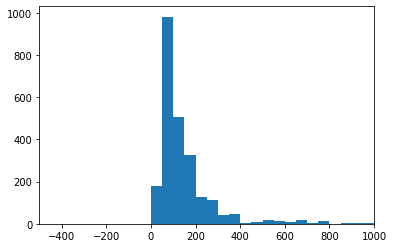

In [20]:
plt.hist(df.price, bins=200)
plt.xlim(right=1000)


In [21]:
np.mean(df.price)

169.06718557968046

It looks like, with some outliers at 10,000 per night and a pretty large range, the majority of the distribution lies between 0 to 400 per night with an average of $169/night. This is pretty in line with what one would think about spending on an airBnB. Though I wonder -- How does this change with the property/room type? A whole house vs. just a room in a house...

In [24]:
df.room_type.value_counts()

Entire home/apt    1809
Private room        602
Hotel room           19
Shared room          11
Name: room_type, dtype: int64

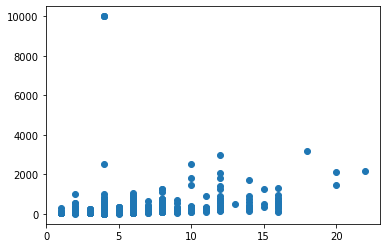

In [3]:
plt.scatter(df.accommodates, df.price)

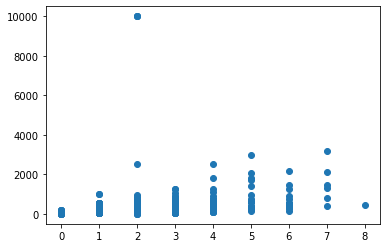

In [9]:
plt.scatter(df.bedrooms, df.price)

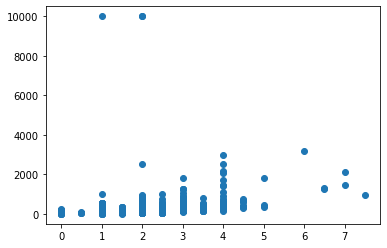

In [5]:
plt.scatter(df.bathrooms, df.price)

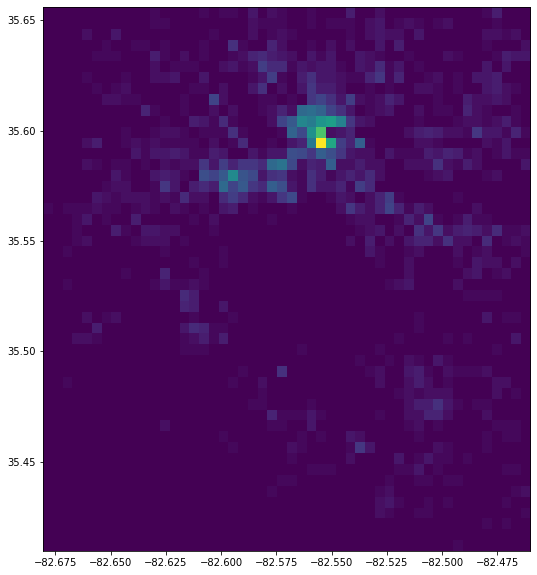

Heatmap of house offerings, red means higher density


In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
heatmap, xedges, yedges = np.histogram2d(df['longitude'], df['latitude'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()
print("Heatmap of house offerings, red means higher density")

Outlier at 10,000/night and 0/night, weird
As # bedrooms increases, so does price (min, avg, high)
Weird that when # of reviews is lower, thats where the higher priced ones are… Quality over quantity could explain?
Review scores rating increases, so does price
Histogram of bedrooms shows mean around 1-2 bedrooms


2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

The expected correlations exist, but there are some comparisons that made me think. Like how do the reviews affect the price both in number and score. There are so many attributes (106) so I’d like to spend more time comparing some less-obvious features against price to see if there are other questions I should be asking. (feature selection)



3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?
